In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data
df = pd.read_csv('~/Desktop/STAT_418/stat418_w22/hw2/q2/movies.csv').reset_index(drop = True)

df = df.rename(columns = {"title": "movie_title",
                          "year":"release_year",
                          "genre":"genre",
                          "rating":"average_rating",
                          "numvotes":"number_of_votes",
                          "plot" : "plot_description"
                           })

df.head()

,movie_title,release_year,genre,average_rating,number_of_votes,plot_description
0,Harakiri,1962,"Action,Drama,History",8.7,29900,When a ronin requesting seppuku at a feudal lo...
1,Trainspotting,1996,Drama,8.1,606949,"Renton, deeply immersed in the Edinburgh drug ..."
2,Unforgiven,1992,"Drama,Western",8.2,353635,Retired Old West gunslinger William Munny (Cli...
3,Andrei Rublev,1966,"Biography,Drama,History",8.2,41586,"The life, times and afflictions of the fifteen..."
4,Hachi: A Dog's Tale,2009,"Drama,Family",8.1,234221,A college professor bonds with an abandoned do...


In [8]:
# For each release year: 
    # Count of movies
    # average rating
    # standard error
    # confidence interval
agg = df.groupby('release_year').agg({'movie_title':'count', 'average_rating':'mean'}).reset_index()
sigma = 1 # assumed in instructions
agg.loc[:,'standard_error'] = sigma / np.sqrt(agg['movie_title'])
agg.loc[:,'conf_int'] = 1.96 * agg['standard_error']

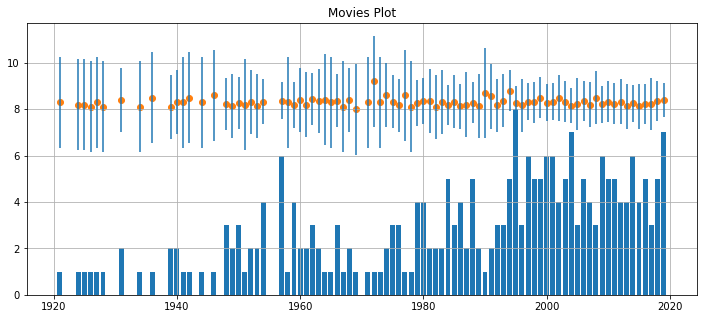

In [17]:
# config
fig, ax = plt.subplots(figsize=(12,5))
# plotting
ax.bar(x=agg['release_year'], height=agg['movie_title'])
ax.scatter(x=agg['release_year'], y=agg['average_rating'])
ax.errorbar(x=agg['release_year'], y=agg['average_rating'], yerr=[agg['conf_int'], agg['conf_int']], linestyle = 'None')
plt.grid(True, which='both')
plt.title("Movies Plot")
# save ~ export
plt.savefig("q4_plot_movie.png")
plt.show()